In [1]:
fig_size = 20

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import lines
from itertools import chain
%matplotlib inline

In [3]:
def apply_multiple_times(f, k, *args):
    result = args
    for _ in range(k):
        result = [f(*result)]
    return result

In [4]:
def get_next_turns(turns):
    new_turns = [i % 2 for i in range(len(turns) + 1)]
    next_turns = turns + new_turns
    next_turns[::2] = new_turns
    next_turns[1::2] = turns
    return next_turns

In [5]:
left_turn_matrix = np.array([
    [0,  1],
    [-1, 0]
])

right_turn_matrix = np.array([
    [0, -1],
    [1, 0]
])

In [6]:
def get_next_point(penult_point, last_point, turn):
    last_vector = last_point - penult_point
    if turn == 0:
        new_vector = last_vector.dot(left_turn_matrix)
    else:
        new_vector = last_vector.dot(right_turn_matrix)
    return last_point + new_vector

In [7]:
def draw_dragon_curve(k):
    turns = apply_multiple_times(get_next_turns, k, [0])[0]
    
    first_point  = np.array([0, 0])
    second_point = np.array([1, 0])
    points = [first_point, second_point]
    for turn in turns:
        points.append(
            get_next_point(points[-2], points[-1], turn)
        )
        
    xs, ys = zip(*points)
    x_min = min(xs) - 1
    x_max = max(xs) + 1
    y_min = min(ys) - 1
    y_max = max(ys) + 1
    x_size = x_max - x_min
    y_size = y_max - y_min
    plt.figure(
        figsize=(
            1.0 * fig_size * x_size / (x_size + y_size), 
            1.0 * fig_size * y_size / (x_size + y_size)
        )
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    
    for segment in zip(points[:-1], points[1:]):
        ax = plt.gca()
        line = lines.Line2D(*zip(*segment))
        ax.add_line(line)

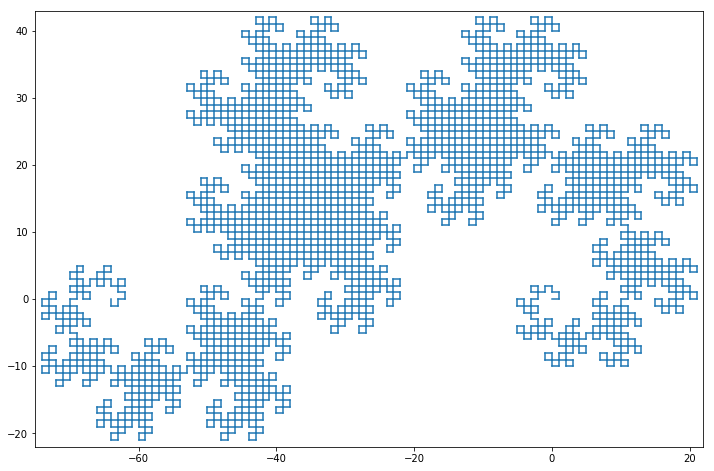

In [8]:
draw_dragon_curve(11)

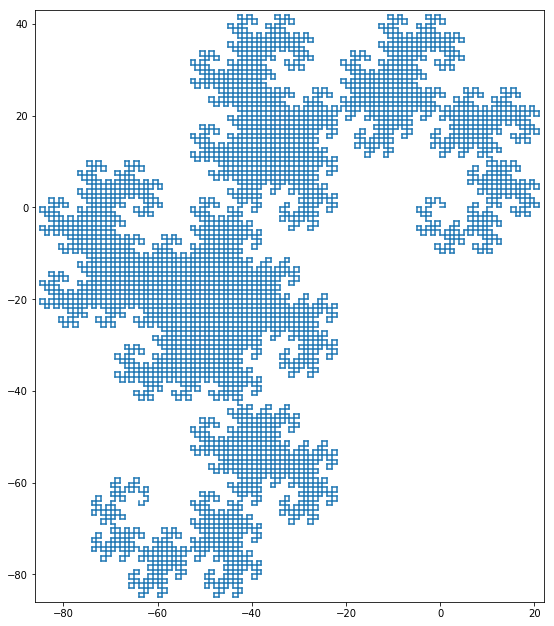

In [9]:
draw_dragon_curve(12)